---
# 아파트 매매 실거래 중위가격(서울, 경기, 대구) 전처리 및 시각화
---

### 목표
* 자료 형태 파악
* 서울, 경기, 대구 데이터만 추출
* 컬럼명 동일하게 맞추기 (서울->서울특별시, 경기->경기도, 대구->대구광역시)
* 연도는 모두 int 타입으로
* csv 파일로 생성

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# 데이터 불러오기
df=pd.read_excel(r'..\data\아파트_매매_실거래_중위가격_20230810150037.xlsx',header=0)
df.head()

c:\Users\KDP-040\anaconda3\envs\MY_PYTHON\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구역별(1),행정구역별(2),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05
0,전국,소계,276.4,275.2,268.5,261.7,263.6,267.6,275.3,288.2,...,303.3,301.7,307.7,341.2,358.9,404.2,429.9,412.9,427.1,436.8
1,수도권,소계,359.5,354.4,342.2,339.3,338.7,347.3,355.8,360.0,...,553.0,528.3,529.9,566.0,576.5,600.1,629.8,609.2,640.0,658.5
2,지방,소계,220.2,221.2,221.9,217.9,220.4,221.8,225.0,230.2,...,253.5,251.5,257.4,263.6,276.5,303.6,316.7,306.0,312.4,316.7
3,서울,서울,511.3,502.9,483.5,486.1,487.4,492.6,501.3,511.9,...,1078.7,1052.1,1054.6,1089.6,1111.5,1164.5,1217.3,1187.3,1223.8,1264.9
4,NaN,도심권,637.3,618.4,612.2,637.4,601.3,632.9,638.0,653.6,...,1589.4,1032.0,1013.4,1205.3,1256.1,1347.9,1279.6,1486.6,1413.8,1530.3


In [86]:
# 결측치 대체
house_DF=df.fillna(method='ffill')
house_DF.head

<bound method NDFrame.head of    행정구역별(1) 행정구역별(2)  2014.01  2014.02  2014.03  2014.04  2014.05  2014.06  \
0        전국       소계    276.4    275.2    268.5    261.7    263.6    267.6   
1       수도권       소계    359.5    354.4    342.2    339.3    338.7    347.3   
2        지방       소계    220.2    221.2    221.9    217.9    220.4    221.8   
3        서울       서울    511.3    502.9    483.5    486.1    487.4    492.6   
4        서울      도심권    637.3    618.4    612.2    637.4    601.3    632.9   
5        서울      동북권    432.3    431.0    428.1    431.3    424.0    426.7   
6        서울      동남권    821.1    788.1    751.7    800.7    800.3    818.4   
7        서울      서북권    499.6    517.6    480.0    500.1    500.0    493.7   
8        서울      서남권    477.0    476.2    463.9    465.3    467.0    476.6   
9       광역시       부산    267.7    265.4    268.9    264.7    261.9    264.8   
10      광역시       대구    269.5    261.7    267.6    264.6    268.2    275.0   
11      광역시       인천    265.8    2

In [87]:
house_DF.columns

Index(['행정구역별(1)', '행정구역별(2)', '2014.01', '2014.02', '2014.03', '2014.04',
       '2014.05', '2014.06', '2014.07', '2014.08',
       ...
       '2022.08', '2022.09', '2022.10', '2022.11', '2022.12', '2023.01',
       '2023.02', '2023.03', '2023.04', '2023.05'],
      dtype='object', length=115)

In [88]:
house_DF=house_DF.set_index(['행정구역별(2)','행정구역별(1)'])

In [89]:
house_DF.head()

2014.01  2014.02  2014.03  2014.04  2014.05  2014.06  \
행정구역별(2) 행정구역별(1)                                                         
소계       전국          276.4    275.2    268.5    261.7    263.6    267.6   
         수도권         359.5    354.4    342.2    339.3    338.7    347.3   
         지방          220.2    221.2    221.9    217.9    220.4    221.8   
서울       서울          511.3    502.9    483.5    486.1    487.4    492.6   
도심권      서울          637.3    618.4    612.2    637.4    601.3    632.9   

                   2014.07  2014.08  2014.09  2014.10  ...  2022.08  2022.09  \
행정구역별(2) 행정구역별(1)                                      ...                     
소계       전국          275.3    288.2    288.4    280.8  ...    303.3    301.7   
         수도권         355.8    360.0    363.7    358.8  ...    553.0    528.3   
         지방          225.0    230.2    230.5    232.2  ...    253.5    251.5   
서울       서울          501.3    511.9    505.9    506.2  ...   1078.7   1052.1   
도심권      서울          638.0    653.6    634.8    658.7  ...   1589.4   1032.0   

                   2022.10  2022.11  2022.12  2023.01  2023.02  2023.03  \
행정구역별(2) 행정구역별(1)                                                         
소계       전국          307.7    341.2    358.9    404.2    429.9    412.9   
         수도권         529.9    566.0    576.5    600.1    629.8    609.2   
         지방          257.4    263.6    276.5    303.6    316.7    306.0   
서울       서울         1054.6   1089.6   1111.5   1164.5   1217.3   1187.3   
도심권      서울         1013.4   1205.3   1256.1   1347.9   1279.6   1486.6   

                   2023.04  2023.05  
행정구역별(2) 행정구역별(1)                    
소계       전국          427.1    436.8  
         수도권         640.0    658.5  
         지방          312.4    316.7  
서울       서울         1223.8   1264.9  
도심권      서울         1413.8   1530.3  

[5 rows x 113 columns]

In [90]:
# 서울, 경기, 대구 데이터만 추출
house_DF_slicing=house_DF.loc[[('서울','서울'),('경기','도'),('대구','광역시')]].reset_index()
house_DF_slicing

,행정구역별(2),행정구역별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05
0,서울,서울,511.3,502.9,483.5,486.1,487.4,492.6,501.3,511.9,...,1078.7,1052.1,1054.6,1089.6,1111.5,1164.5,1217.3,1187.3,1223.8,1264.9
1,경기,도,327.5,321.8,312.0,309.2,313.7,318.2,323.7,329.8,...,506.3,500.1,504.8,554.6,549.7,565.0,591.8,570.9,585.0,600.9
2,대구,광역시,269.5,261.7,267.6,264.6,268.2,275.0,273.8,281.3,...,364.7,358.2,350.4,366.8,378.9,371.7,376.5,371.9,371.3,390.5


In [91]:
house_DF_slicing.set_index('행정구역별(2)',inplace=True)
house_DF_slicing

,행정구역별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,2014.09,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05
행정구역별(2),,,,,,,,,,,,,,,,,,,,,
서울,서울,511.3,502.9,483.5,486.1,487.4,492.6,501.3,511.9,505.9,...,1078.7,1052.1,1054.6,1089.6,1111.5,1164.5,1217.3,1187.3,1223.8,1264.9
경기,도,327.5,321.8,312.0,309.2,313.7,318.2,323.7,329.8,329.4,...,506.3,500.1,504.8,554.6,549.7,565.0,591.8,570.9,585.0,600.9
대구,광역시,269.5,261.7,267.6,264.6,268.2,275.0,273.8,281.3,283.4,...,364.7,358.2,350.4,366.8,378.9,371.7,376.5,371.9,371.3,390.5


In [92]:
house_DF_slicing.drop(columns='행정구역별(1)',axis=1,inplace=True)

In [93]:
house_DF_slicing_T=house_DF_slicing.T

In [94]:
yearList=house_DF_slicing_T.reset_index()['index'].str[:4]
yearList

0      2014
1      2014
2      2014
3      2014
4      2014
       ... 
108    2023
109    2023
110    2023
111    2023
112    2023
Name: index, Length: 113, dtype: object

In [95]:
house_DF_slicing_T['년도']=yearList.to_list()

In [96]:
house_DF_slicing_T.set_index('년도',drop=True, inplace=True)
house_DF_slicing_T.head()

행정구역별(2),서울,경기,대구
년도,,,
2014,511.3,327.5,269.5
2014,502.9,321.8,261.7
2014,483.5,312.0,267.6
2014,486.1,309.2,264.6
2014,487.4,313.7,268.2


In [97]:
# 년도에 따른 평균 계산
year_local_house=house_DF_slicing_T.groupby('년도').mean()

In [98]:
year_local_house.T


년도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
행정구역별(2),,,,,,,,,,
서울,500.208333,531.375000,580.875000,663.316667,696.150000,863.791667,978.400000,1233.233333,1161.191667,1211.56
경기,322.791667,340.291667,364.500000,391.825000,408.891667,397.133333,437.808333,548.908333,541.700000,582.72
대구,277.300000,311.041667,305.841667,321.000000,332.441667,324.266667,357.966667,358.983333,360.725000,376.38


In [99]:
year_local_house
year_local_house_copy = year_local_house.copy()

<BarContainer object of 10 artists>

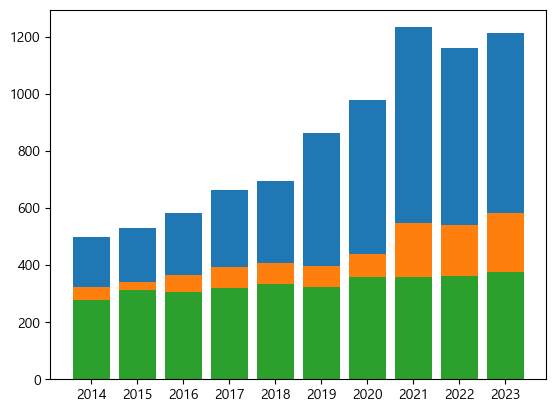

In [100]:
# 연도별 1m^2 당 비용을 시각화
plt.bar(x=year_local_house["서울"].index, height=year_local_house["서울"].values)
plt.bar(x=year_local_house["경기"].index, height=year_local_house["경기"].values)
plt.bar(x=year_local_house["대구"].index, height=year_local_house["대구"].values)


In [101]:
house_DF.loc['서울','서울']
house_DF.loc['경기','도']
house_DF.loc['대구','광역시']

2014.01    269.5
2014.02    261.7
2014.03    267.6
2014.04    264.6
2014.05    268.2
           ...  
2023.01    371.7
2023.02    376.5
2023.03    371.9
2023.04    371.3
2023.05    390.5
Name: (대구, 광역시), Length: 113, dtype: float64

In [102]:
house_DF.index

MultiIndex([( '소계',  '전국'),
            ( '소계', '수도권'),
            ( '소계',  '지방'),
            ( '서울',  '서울'),
            ('도심권',  '서울'),
            ('동북권',  '서울'),
            ('동남권',  '서울'),
            ('서북권',  '서울'),
            ('서남권',  '서울'),
            ( '부산', '광역시'),
            ( '대구', '광역시'),
            ( '인천', '광역시'),
            ( '광주', '광역시'),
            ( '대전', '광역시'),
            ( '울산', '광역시'),
            ( '소계',  '세종'),
            ( '경기',   '도'),
            ( '강원',   '도'),
            ( '충북',   '도'),
            ( '충남',   '도'),
            ( '전북',   '도'),
            ( '전남',   '도'),
            ( '경북',   '도'),
            ( '경남',   '도'),
            ( '제주',   '도')],
           names=['행정구역별(2)', '행정구역별(1)'])

In [103]:
list1 =year_local_house.index.to_list()
list2= []
for i in list1:
    list2.append(int(i))

year_local_house.index = list2

In [104]:
year_local_house.index

Int64Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64')

In [105]:
year_local_house

행정구역별(2),서울,경기,대구
2014,500.208333,322.791667,277.300000
2015,531.375000,340.291667,311.041667
2016,580.875000,364.500000,305.841667
2017,663.316667,391.825000,321.000000
2018,696.150000,408.891667,332.441667
2019,863.791667,397.133333,324.266667
2020,978.400000,437.808333,357.966667
2021,1233.233333,548.908333,358.983333
2022,1161.191667,541.700000,360.725000
2023,1211.560000,582.720000,376.380000


In [106]:
for i in year_local_house.index:
    if i<2023:
        year_local_house.loc[str(i)+"-"+str(i+1)]=(year_local_house.loc[i+1]-year_local_house.loc[i])/year_local_house.loc[i]*100
    

In [107]:
# 증가 비율 계산
year_ratio=year_local_house[10:].mean()
year_ratio

행정구역별(2)
서울    10.731102
경기     7.043316
대구     3.562159
dtype: float64

In [108]:
list1 =year_local_house_copy.index.to_list()
list2= []
for i in list1:
    list2.append(int(i))

year_local_house_copy.index = list2

In [109]:
year_local_house_copy

행정구역별(2),서울,경기,대구
2014,500.208333,322.791667,277.300000
2015,531.375000,340.291667,311.041667
2016,580.875000,364.500000,305.841667
2017,663.316667,391.825000,321.000000
2018,696.150000,408.891667,332.441667
2019,863.791667,397.133333,324.266667
2020,978.400000,437.808333,357.966667
2021,1233.233333,548.908333,358.983333
2022,1161.191667,541.700000,360.725000
2023,1211.560000,582.720000,376.380000


In [110]:
# 증가율을 반영하여 2024년 이후 데이터 생성
year_local_house_copy
for i in range(2023,2054):
    year_local_house_copy.loc[i+1]=year_local_house_copy.loc[i]*(1+year_ratio/100)
year_local_house_copy.tail()

행정구역별(2),서울,경기,대구
2050,18994.363938,3660.731568,968.402950
2051,21032.668565,3918.568459,1002.899001
2052,23289.705748,4194.565617,1038.623856
2053,25788.947900,4490.002126,1075.621288
2054,28556.386284,4806.247162,1113.936626


In [111]:
# 59m^2(약 18평)로 비용 계산 후 csv파일로 저장
year_local_house_copy.columns=['서울특별시','경기도','대구광역시']
final_data=year_local_house_copy.loc[2023:]*59/10000
final_data.to_csv('../data/house_price_all.csv')


In [119]:
# 데이터 잘 저장되었는지 확인
df=pd.read_csv('../data/house_price_all.csv')

In [120]:
df.rename(columns={'Unnamed: 0':'연도'},inplace=True)

In [121]:
df.head()

,연도,서울특별시,경기도,대구광역시
0,2023,7.148204,3.438048,2.220642
1,2024,7.915285,3.680201,2.299745
2,2025,8.764682,3.939409,2.381665
3,2026,9.705229,4.216874,2.466504
4,2027,10.746708,4.513881,2.554365


In [122]:
df.set_index('연도').tail()

,서울특별시,경기도,대구광역시
연도,,,
2050,112.066747,21.598316,5.713577
2051,124.092745,23.119554,5.917104
2052,137.409264,24.747937,6.127881
2053,152.154793,26.491013,6.346166
2054,168.482679,28.356858,6.572226


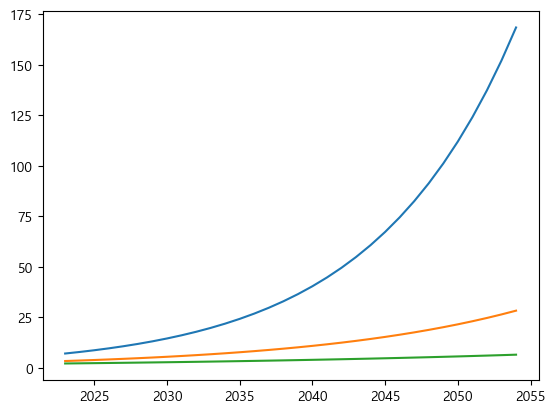

In [112]:
# 증가율 반영한 데이터 시각화
plt.plot(final_data["서울특별시"])
plt.plot(final_data["경기도"])
plt.plot(final_data["대구광역시"])
# plt.plot(x=year_local_house_copy["경기"].index, height=year_local_house_copy["경기"].values)
# plt.plot(x=year_local_house_copy["대구"].index, height=year_local_house_copy["대구"].values)


---
# 연봉 상승률 데이터 불러오기
---

In [113]:
df2=pd.read_excel(r'..\data\연봉 상승률.xlsx')
df2

,Unnamed: 0,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054
0,서울특별시,3083.392857,3370.404220,3684.131452,4027.061347,4401.912175,4811.655231,5259.538387,5749.111837,6284.256237,...,21847.295100,23880.906199,26103.811857,28533.632175,31189.627383,34092.850511,37266.314268,40735.173454,44526.924354,48671.622687
1,경기도,3060.769231,3337.165855,3638.521921,3967.091342,4325.331566,4715.921954,5141.783824,5606.102295,6112.350114,...,20505.439641,22357.142223,24376.059091,26577.290197,28977.299060,31594.035908,34447.071927,37557.745639,40949.322499,44647.168901
2,대구광역시,2866.666667,3070.870636,3289.620859,3523.953524,3774.978627,4043.885239,4331.947129,4640.528803,4971.091966,...,13026.638159,13954.576957,14948.616494,16013.465387,17154.167664,18376.126663,19685.130619,21087.380088,22589.517315,24198.657700


In [114]:
df2.set_index('Unnamed: 0',inplace=True)

In [115]:
df2.T.head()

Unnamed: 0,서울특별시,경기도,대구광역시
2023,3083.392857,3060.769231,2866.666667
2024,3370.404220,3337.165855,3070.870636
2025,3684.131452,3638.521921,3289.620859
2026,4027.061347,3967.091342,3523.953524
2027,4401.912175,4325.331566,3774.978627


In [116]:
# 50프로 저축시 언제 내집마련 가능한지 계산
for i in range(2023,2050):
    if final_data['대구광역시'][i] < (df2.T['대구광역시'].loc[2024:i+1]*0.5).sum()/10000:
        print(i-2022)
        print(i)
        break

15
2037
